
<h1><center><font size=12>Data Science</center></font></h1>
<h1><center>Project 2: Travel Insurance Data Analysis</center></h1>

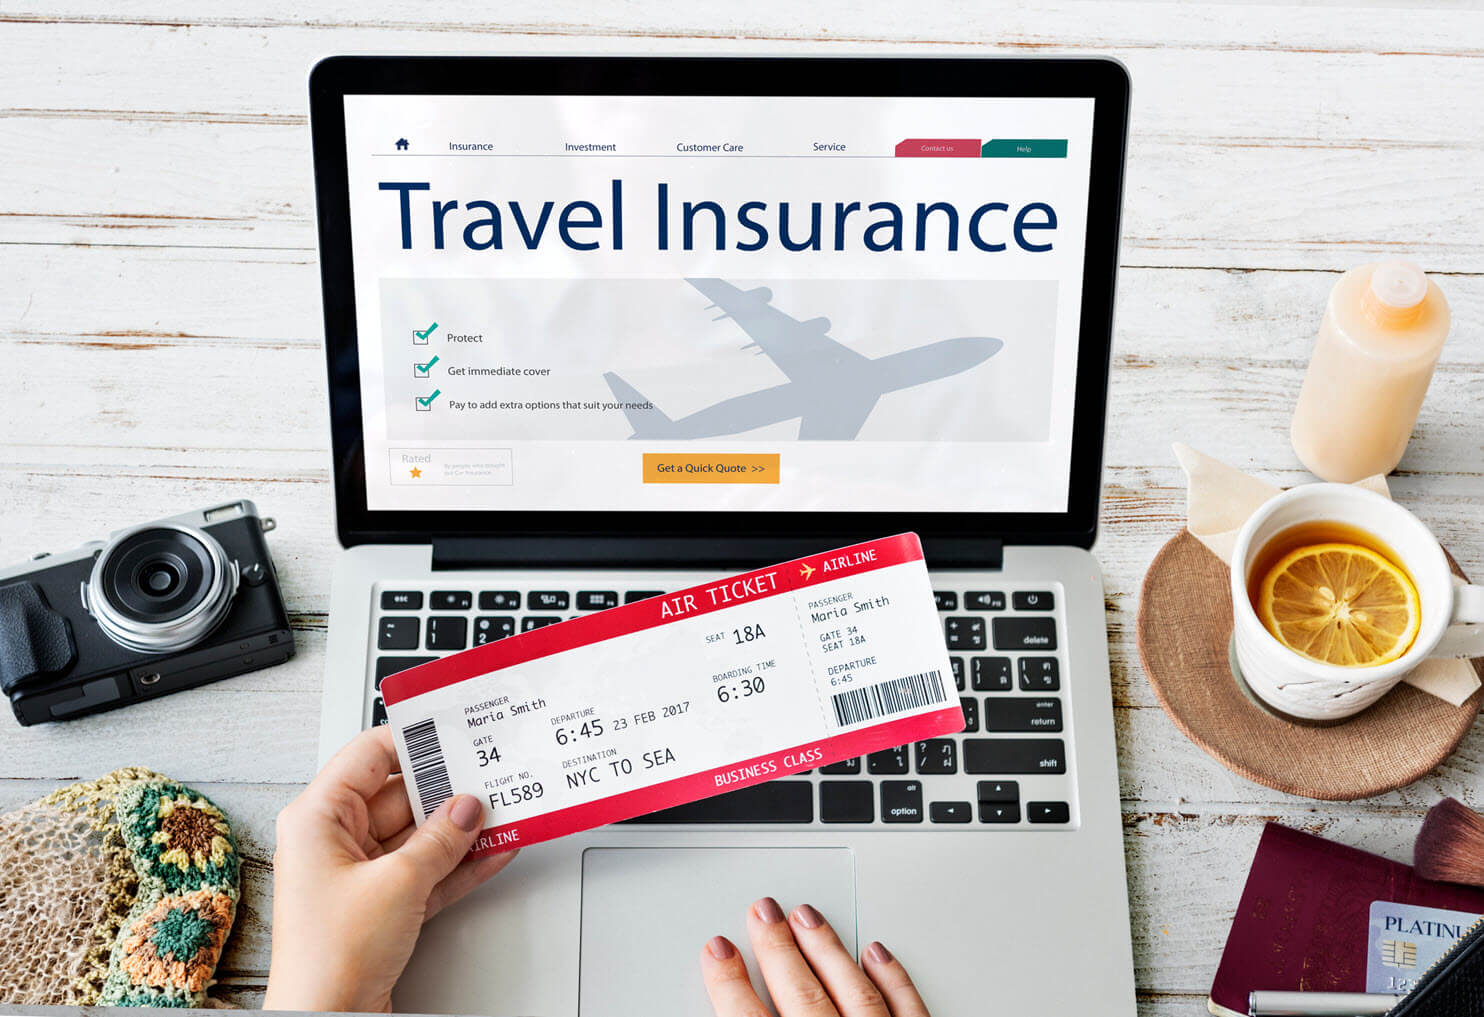



# Objective:

- To test various hypothesis relating to Travel insurance data

**Data Processing Task**

* For each column name, replace all white spaces and special characters with `_`

  -- for example:  `Distribution Channel` to `Distribution_Channel`

* Convert all records in `Location` from uppercase to lowercase (while capitlaizing the first Letter of each country)

  -- for example : `FRANCE` to `France`

 * Convert column with negative values to absolute values

 -- for example : `-49` to `49`




**Basic Questions:**

* Visualize the distribution of `Distribution_Channel`,`Agency_Type`, `Continent`.

* visualize the relationship between `Product` and `Net_sales`

* visualize the relationship between `Agency_Type` and `Commission`




**Key business questions**

* What `agency` has the most and least `commission`?
* What `Product` has the least `Duration`?
* On the average can you identify the top 5 countries with the highest `net sales`
* There's no significant differences between the `net sales` of `France` and `Germany`, can you test this hypothesis?
* Is there a statistical difference in the average `age` of insurees of `China`,`India`,and `Spain`?


look into

- shapiro test https://www.statology.org/shapiro-wilk-test-python/,

- t-test https://www.statology.org/pandas-t-test/

-  Mann whitney test https://www.statology.org/mann-whitney-u-test-python/

look into :

- https://www.statology.org/kruskal-wallis-test-python/

-  https://www.statology.org/one-way-anova-python/

- https://www.statology.org/tukey-test-python/



# Dataset:

**Claim:** Claim (Yes or No)

**Name of agency** (Agency)

**Type of travel insurance agencies** (Agency Type)

**Distribution channel of travel insurance agencies** (Distribution.Channel)

**Name of the travel insurance products** (Product.Name)

**Duration of travel** (Duration)

**Destination of travel** (Destination)

**Amount of sales of travel insurance policies** (Net.Sales)

**Commission received for travel insurance agency** (Commission)

**Age of insured** (Age)


In [45]:
#import pandas package

import pandas as pd # data  loading, manipulation and wrangling
pd.set_option('display.max_rows', None) # display all rows in the dataset
pd.set_option('display.max_columns', None) # display all columns in the dataset
pd.set_option('display.float_format', lambda x: '%.2f' % x) # suppress all scientific notations and round to 2 decimal places
import numpy as np

#Visualization
import plotly.express as px #interactive visualization
import seaborn as sns # statistical visualization
import matplotlib.pyplot as plt # basic visualization
# Command to tell Python to actually display the graphs
%matplotlib inline

# statistical Analysis library
import scipy.stats as stats
from scipy.stats import ttest_ind
from scipy.stats import shapiro



In [46]:
#connecting to google drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [47]:
#read data from google drive
travelinsurance = pd.read_csv('/content/drive/MyDrive/wale/datasets/travel_insurance.csv')



In [48]:
df = travelinsurance.copy()

##General Data Overview

###Check for `Head`, `datatype` and `summary statistics`

In [49]:
df.head(10)

,Agency,Agency Type,Distribution Channel,Product Name,Claim,Duration,Location,Net Sales,Commision (in value),Age
0,CBH,Travel Agency,Offline,Comprehensive Plan,No,186,MALAYSIA,-29.00,9.57,81
1,CBH,Travel Agency,Offline,Comprehensive Plan,No,186,MALAYSIA,-29.00,9.57,71
2,CWT,Travel Agency,Online,Rental Vehicle Excess Insurance,No,65,AUSTRALIA,-49.50,29.70,32
3,CWT,Travel Agency,Online,Rental Vehicle Excess Insurance,No,60,AUSTRALIA,-39.60,23.76,32
4,CWT,Travel Agency,Online,Rental Vehicle Excess Insurance,No,79,ITALY,-19.80,11.88,41
5,JZI,Airlines,Online,Value Plan,No,66,UNITED STATES,-121.00,42.35,44
6,CWT,Travel Agency,Online,Rental Vehicle Excess Insurance,No,47,UNITED STATES,-39.60,23.76,32
7,CWT,Travel Agency,Online,Rental Vehicle Excess Insurance,No,63,AUSTRALIA,-108.90,65.34,29
8,CWT,Travel Agency,Online,Rental Vehicle Excess Insurance,No,57,THAILAND,-19.80,11.88,44
9,CWT,Travel Agency,Online,Rental Vehicle Excess Insurance,No,186,AUSTRALIA,-99.00,59.40,37


In [50]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 63326 entries, 0 to 63325
Data columns (total 10 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Agency                63326 non-null  object 
 1   Agency Type           63326 non-null  object 
 2   Distribution Channel  63326 non-null  object 
 3   Product Name          63326 non-null  object 
 4   Claim                 63326 non-null  object 
 5   Duration              63326 non-null  int64  
 6   Location              63326 non-null  object 
 7   Net Sales             63326 non-null  float64
 8   Commision (in value)  63326 non-null  float64
 9   Age                   63326 non-null  int64  
dtypes: float64(2), int64(2), object(6)
memory usage: 4.8+ MB


In [51]:
# for categorical/Non-numeric variables
df.describe(include= 'object').T


,count,unique,top,freq
Agency,63326,16,EPX,35119
Agency Type,63326,2,Travel Agency,45869
Distribution Channel,63326,2,Online,62219
Product Name,63326,26,Cancellation Plan,18630
Claim,63326,2,No,62399
Location,63326,150,SINGAPORE,13255


*Observation* : 16 unique Agencies broadly categorized into 2 Agency types from a 2 distinct distribution channels spread across 150 countries

In [52]:
# for continuous/numeric variables

df.describe(include = ['int','float']).T

,count,mean,std,min,25%,50%,75%,max
Duration,63326.00,49.32,101.79,-2.00,9.00,22.00,53.00,4881.00
Net Sales,63326.00,40.70,48.85,-389.00,18.00,26.53,48.00,810.00
Commision (in value),63326.00,9.81,19.80,0.00,0.00,0.00,11.55,283.50
Age,63326.00,39.97,14.02,0.00,35.00,36.00,43.00,118.00


*observation*: Since `mean values` != `median values`, we can conclude that these continuous variables are not normally(gaussian) distributed

## Data Processing Tasks
### Strip  `()` and white spaces"` `"and replace with `_`

In [53]:
list(df.columns)

['Agency',
 'Agency Type',
 'Distribution Channel',
 'Product Name',
 'Claim',
 'Duration',
 'Location',
 'Net Sales',
 'Commision (in value)',
 'Age']

In [54]:
df.columns = df.columns.str.replace('(','_')
df.columns = df.columns.str.replace(')','')
# replace all white spaces and special characters with _
df.columns = df.columns.str.replace(' ', '_')
df.columns = df.columns.str.replace('__','_')
list(df.columns)

<ipython-input-54-722e27a3e7b3>:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df.columns = df.columns.str.replace('(','_')
<ipython-input-54-722e27a3e7b3>:2: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df.columns = df.columns.str.replace(')','')


['Agency',
 'Agency_Type',
 'Distribution_Channel',
 'Product_Name',
 'Claim',
 'Duration',
 'Location',
 'Net_Sales',
 'Commision_in_value',
 'Age']

In [55]:
#df.columns = df.columns.str.replace('','_')
list(df.columns)

['Agency',
 'Agency_Type',
 'Distribution_Channel',
 'Product_Name',
 'Claim',
 'Duration',
 'Location',
 'Net_Sales',
 'Commision_in_value',
 'Age']

####Convert all records in Location from uppercase to lowercase (while capitalizing the first Letter of each country)

In [56]:
#Convert all records in Location from uppercase to lowercase (while capitlaizing the first Letter of each country) for example : FRANCE to France


df['Location']= df.Location.str.title()
df['Location'].value_counts()

Singapore                                     13255
Malaysia                                       5930
Thailand                                       5894
China                                          4796
Australia                                      3694
Indonesia                                      3452
United States                                  2530
Philippines                                    2490
Hong Kong                                      2411
India                                          2251
Japan                                          2061
Viet Nam                                       1668
Korea, Republic Of                             1479
United Kingdom                                 1309
Taiwan, Province Of China                      1090
Myanmar                                         806
Brunei Darussalam                               780
New Zealand                                     537
Canada                                          528
Cambodia    

#### Convert column with negative values to absolute values for example : -49 to 49

In [57]:
df['Net_Sales'].head(5)

0   -29.00
1   -29.00
2   -49.50
3   -39.60
4   -19.80
Name: Net_Sales, dtype: float64

In [58]:
df['Net_Sales'].abs().head(5)

0   29.00
1   29.00
2   49.50
3   39.60
4   19.80
Name: Net_Sales, dtype: float64

####Basic Exploratory Questions

#####Visualize the distribution of `Distribution_Channel`,`Agency_Type`, `Product`.

-two user defined Functions that can be used for `Categorical`(barplot) and `Continuous`(boxplot and histogram) variables

In [59]:
# function to create labeled barplots


def labeled_barplot(data, feature, perc=False, n=None):
    """
    Barplot with percentage at the top

    data: dataframe
    feature: dataframe column
    perc: whether to display percentages instead of count (default is False)
    n: displays the top n category levels (default is None, i.e., display all levels)
    """

    total = len(data[feature])  # length of the column
    count = data[feature].nunique()
    if n is None:
        plt.figure(figsize=(count + 1, 5))
    else:
        plt.figure(figsize=(n + 1, 5))

    plt.xticks(rotation=90, fontsize=15)
    ax = sns.countplot(
        data=data,
        x=feature,
        palette="Paired",
        order=data[feature].value_counts().index[:n].sort_values(),
    )

    for p in ax.patches:
        if perc == True:
            label = "{:.1f}%".format(
                100 * p.get_height() / total
            )  # percentage of each class of the category
        else:
            label = p.get_height()  # count of each level of the category

        x = p.get_x() + p.get_width() / 2  # width of the plot
        y = p.get_height()  # height of the plot

        ax.annotate(
            label,
            (x, y),
            ha="center",
            va="center",
            size=12,
            xytext=(0, 5),
            textcoords="offset points",
        )  # annotate the percentage

    plt.show()  # show the plot

<ipython-input-59-1e58b03272cc>:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(


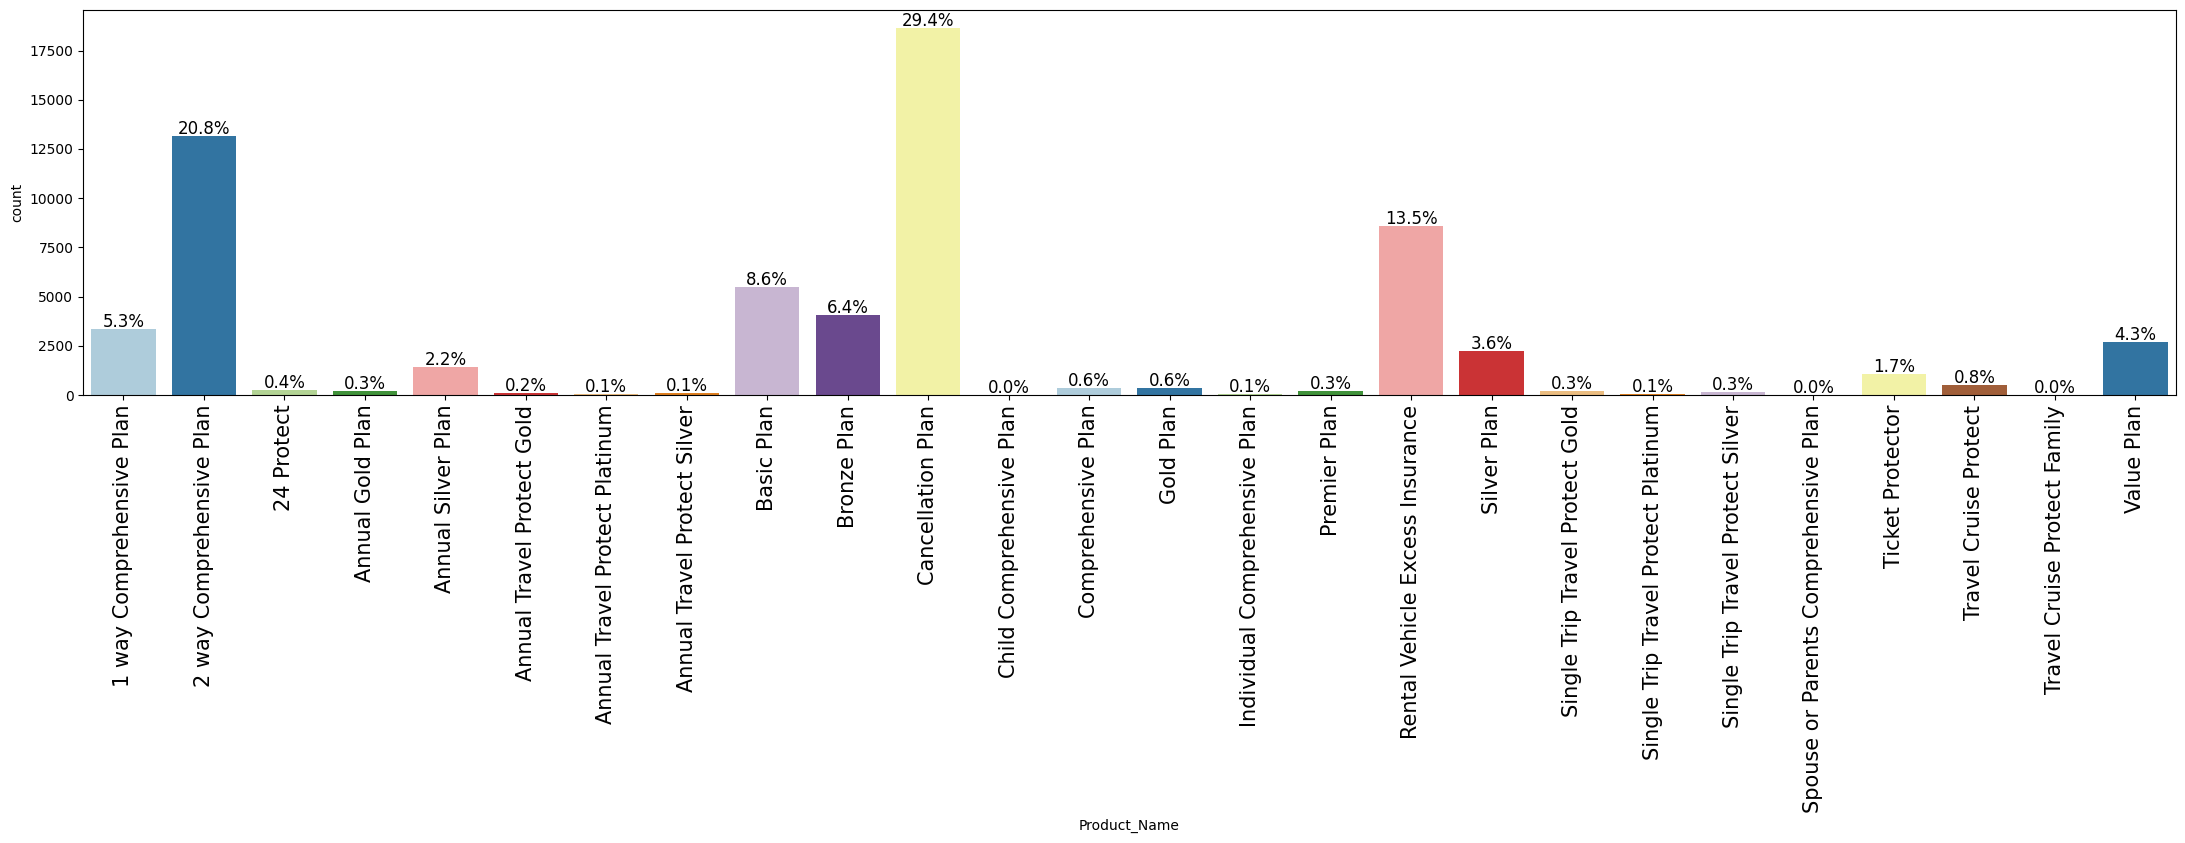

In [60]:
labeled_barplot(df,'Product_Name',perc = True)

<ipython-input-59-1e58b03272cc>:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(


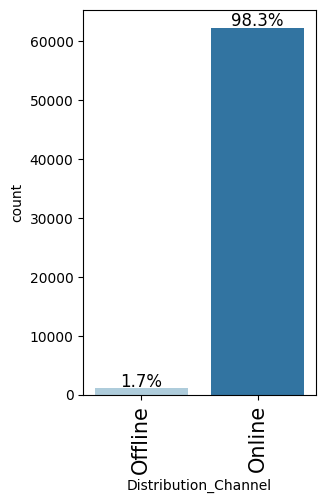

In [61]:
labeled_barplot(df,"Distribution_Channel", perc=True)

<ipython-input-59-1e58b03272cc>:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(


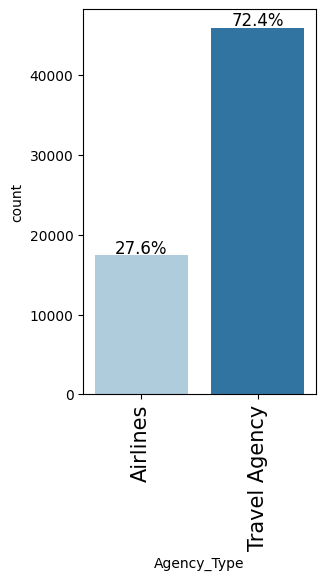

In [62]:
labeled_barplot(df,"Agency_Type", perc=True)

<ipython-input-59-1e58b03272cc>:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(


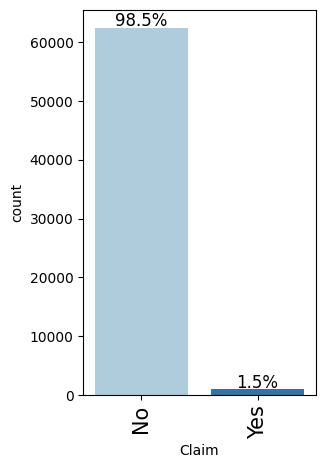

In [63]:
labeled_barplot(df,"Claim", perc=True)

<ipython-input-59-1e58b03272cc>:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(


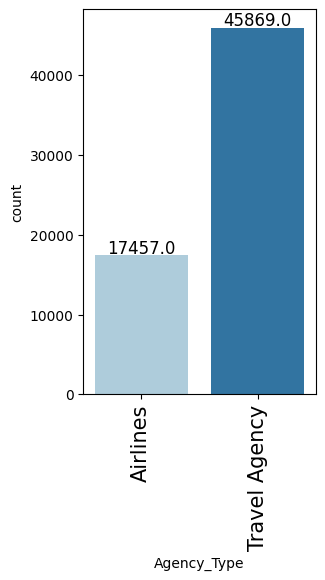

<ipython-input-59-1e58b03272cc>:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(


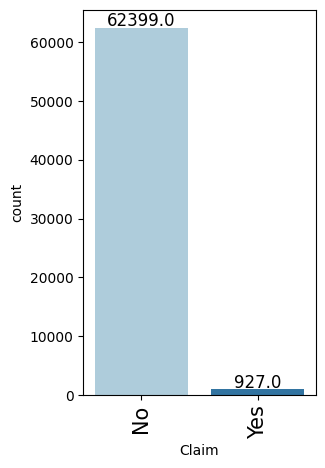

<ipython-input-59-1e58b03272cc>:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(


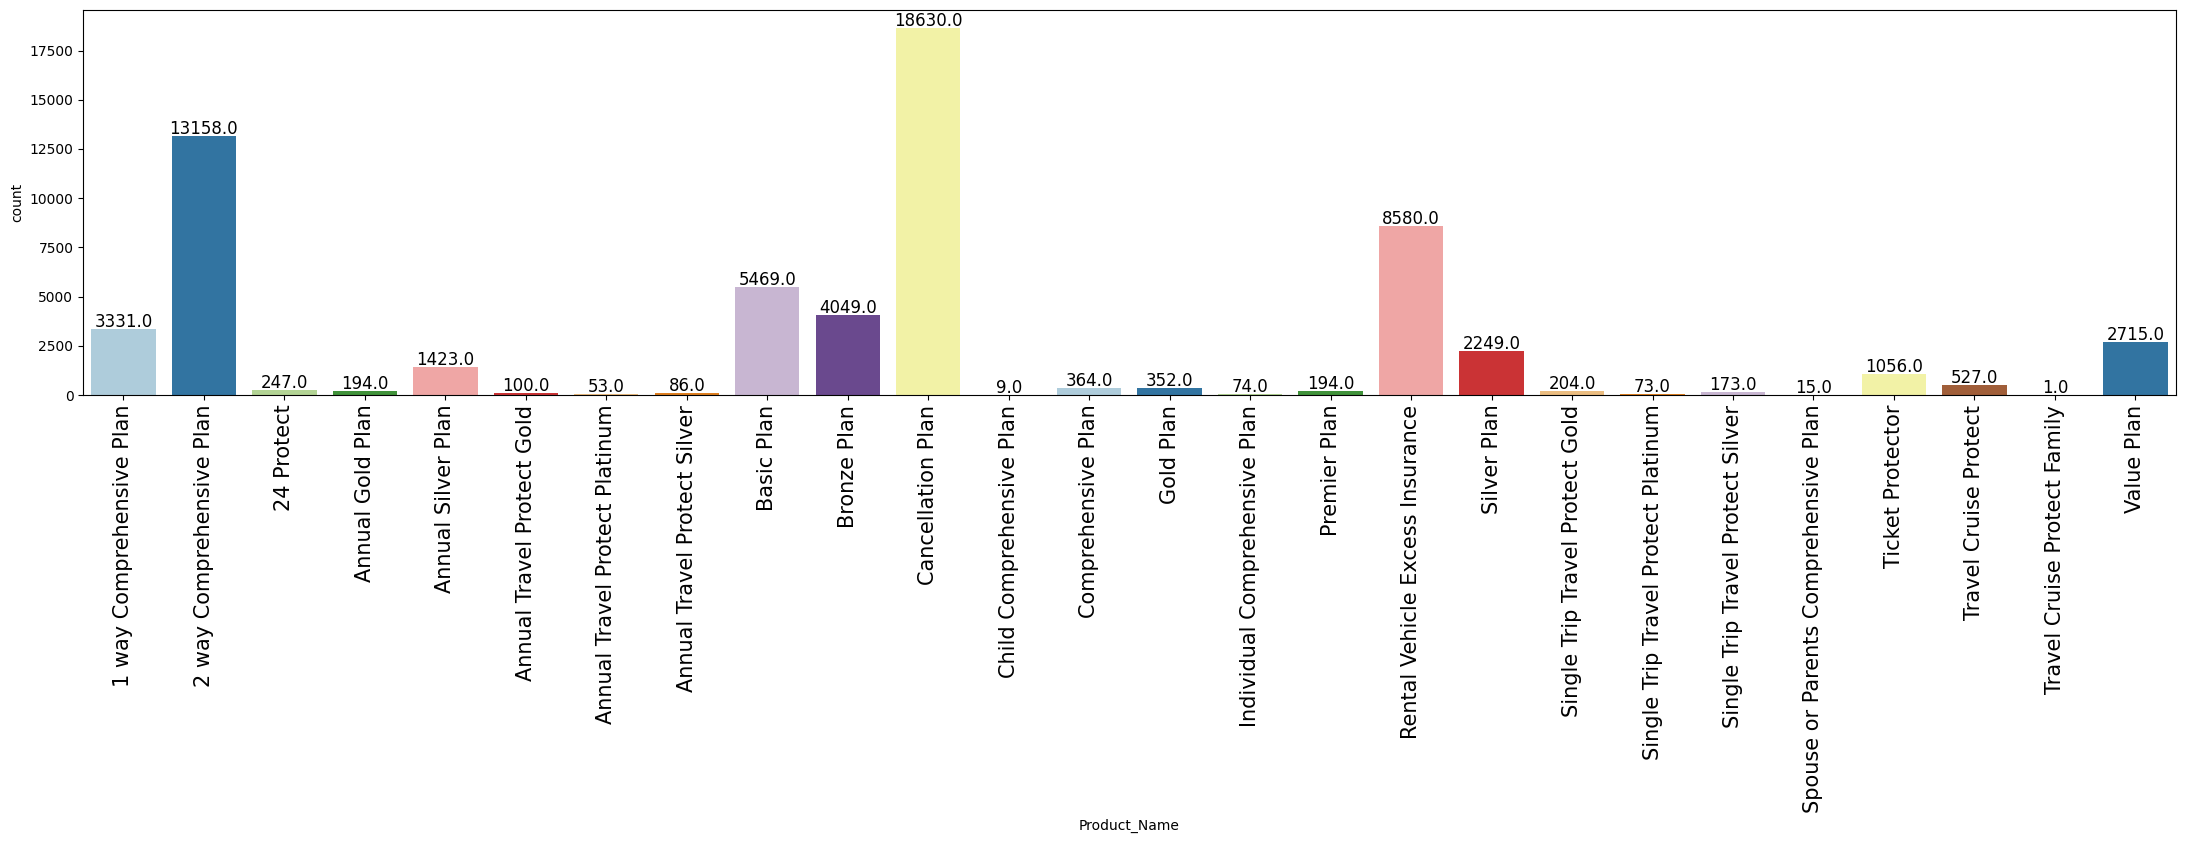

<ipython-input-59-1e58b03272cc>:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(


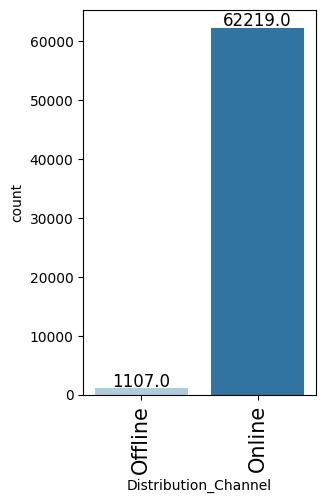

In [64]:
for col in df[['Agency_Type','Claim','Product_Name','Distribution_Channel']].columns:
    labeled_barplot(df, col)

In [65]:
# function to plot a boxplot and a histogram along the same scale.


def histogram_boxplot(data, feature, figsize=(12, 7), kde=False, bins=None):
    """
    Boxplot and histogram combined

    data: dataframe
    feature: dataframe column
    figsize: size of figure (default (12,7))
    kde: whether to the show density curve (default False)
    bins: number of bins for histogram (default None)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows=2,  # Number of rows of the subplot grid= 2
        sharex=True,  # x-axis will be shared among all subplots
        gridspec_kw={"height_ratios": (0.25, 0.75)},
        figsize=figsize,
    )  # creating the 2 subplots
    sns.boxplot(
        data=data, x=feature, ax=ax_box2, showmeans=True, color="violet"
    )  # boxplot will be created and a star will indicate the mean value of the column
    sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2, bins=bins, palette="winter"
    ) if bins else sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2
    )  # For histogram
    ax_hist2.axvline(
        data[feature].mean(), color="green", linestyle="--"
    )  # Add mean to the histogram
    ax_hist2.axvline(
        data[feature].median(), color="black", linestyle="-"
    )  # Add median to the histogram

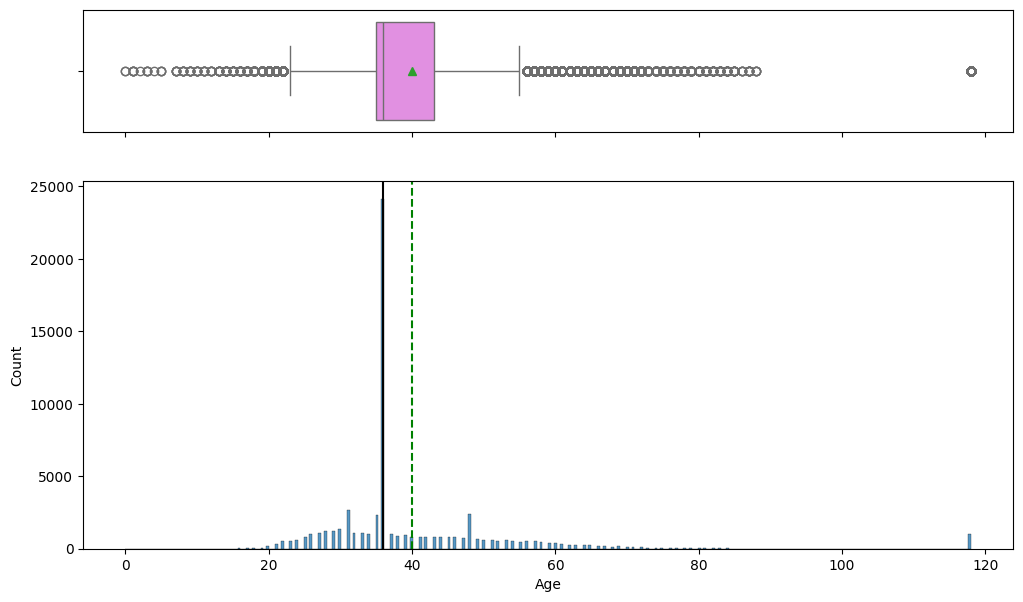

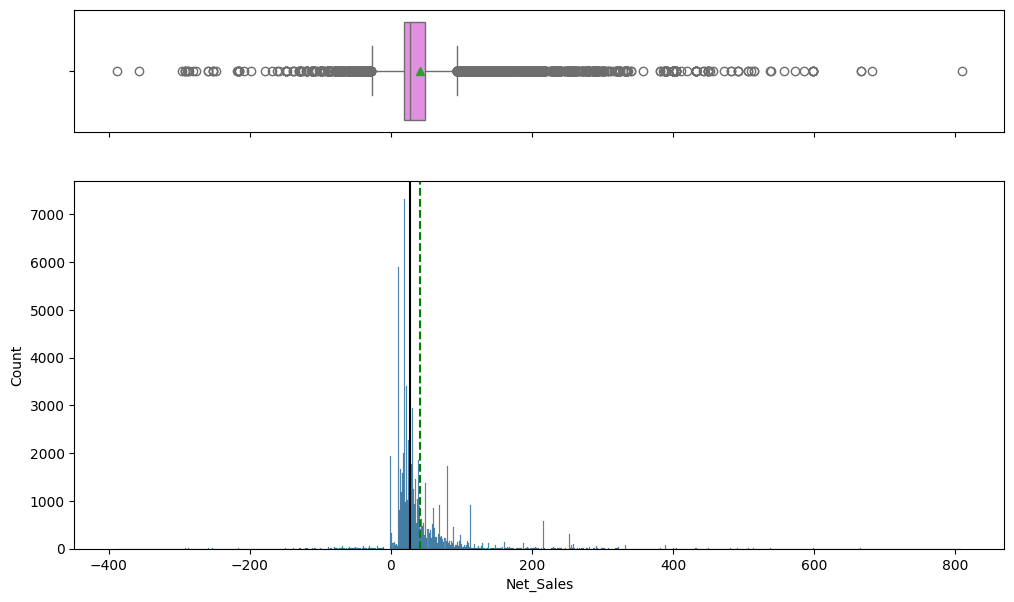

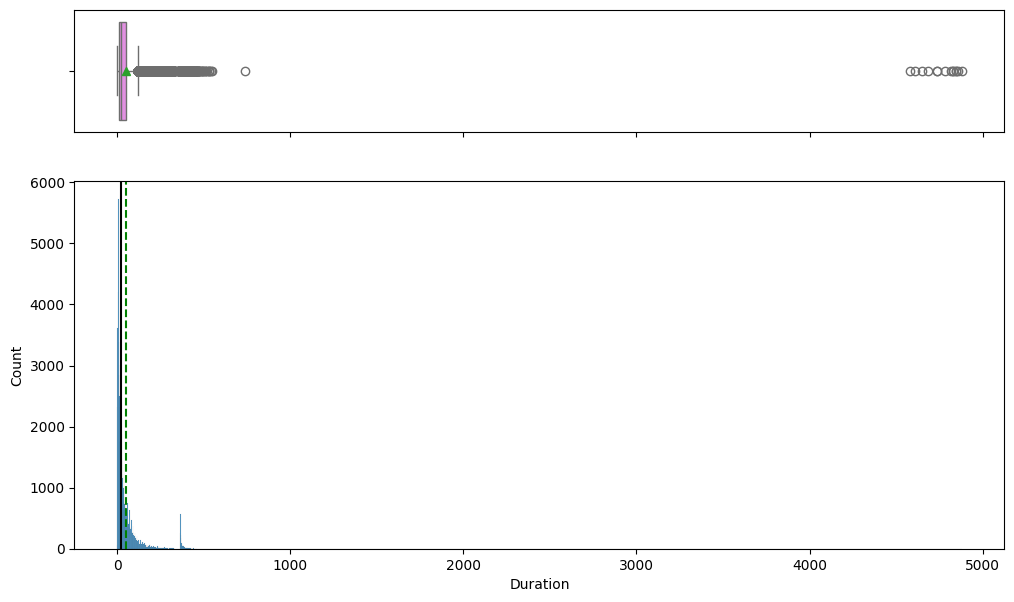

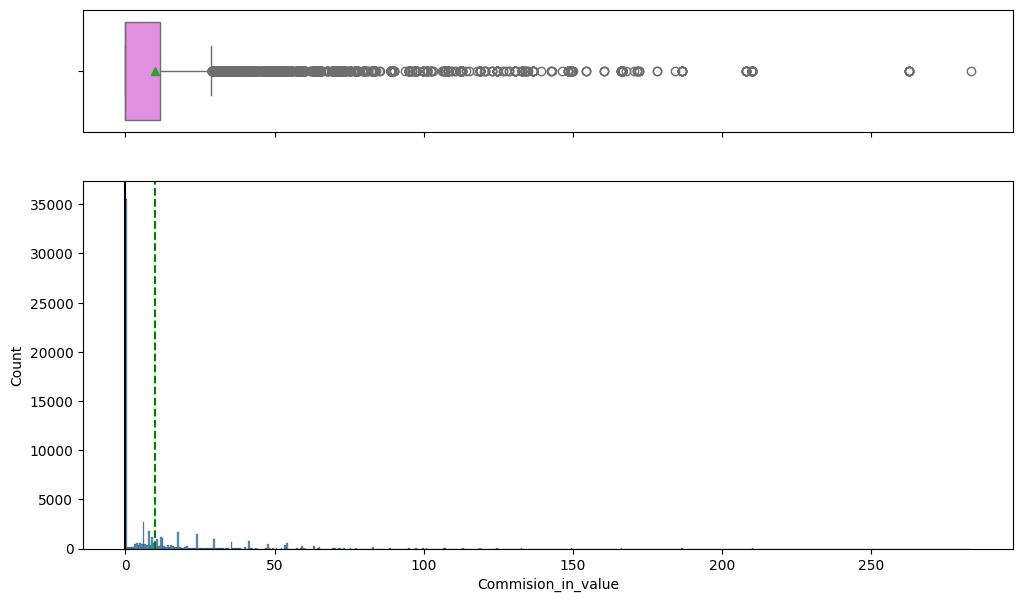

In [66]:
for col in df[['Age','Net_Sales','Duration','Commision_in_value']].columns:
    histogram_boxplot(df, col)

####visualize the relationship between `Product` and `Net_sales`

In [67]:
def stacked_barplot(data, predictor, target):
    """
    Print the category counts and plot a stacked bar chart

    data: dataframe
    predictor: independent variable
    target: target variable
    """
    count = data[predictor].nunique()
    sorter = data[target].value_counts().index[-1]
    tab1 = pd.crosstab(data[predictor], data[target], margins=True).sort_values(
        by=sorter, ascending=False
    )
    print(tab1)
    print("-" * 120)
    tab = pd.crosstab(data[predictor], data[target], normalize="index").sort_values(
        by=sorter, ascending=False
    )
    tab.plot(kind="bar", stacked=True, figsize=(count + 1, 5))
    plt.legend(
        loc="lower left",
        frameon=False,
    )
    plt.legend(loc="upper left", bbox_to_anchor=(1, 1))
    plt.show()

In [68]:
stacked_barplot(df,"Commision_in_value","Agency_Type")

Agency_Type         Airlines  Travel Agency    All
Commision_in_value                                
All                    17457          45869  63326
7.7                     1661              0   1661
6.3                     1155              0   1155
9.1                      929              0    929
54.0                     572              0    572
6.0                      565              0    565
12.25                    557              0    557
4.0                      453              0    453
10.5                     357            527    884
3.38                     341              0    341
12.4                     336              0    336
6.75                     311              1    312
63.21                    306              0    306
8.38                     250              0    250
14.0                     217              0    217
5.0                      215              0    215
9.75                     206              0    206
4.63                     204   

ValueError: Image size of 103600x500 pixels is too large. It must be less than 2^16 in each direction.

<Figure size 103600x500 with 1 Axes>

In [69]:

#visualize the relationship between continent and Net_sales
#visualize the relationship between Agency_Type and Commission#
#stacked_barplot(df, "Agency_Type","Commision_(in_value)")


#####What agency has the most and least commission?

In [70]:
#Top 5 countries with the highest net sales - Singapore, UnitedStates, Australia,China, Thailand
most_least_commission = df.groupby('Agency').sum()[['Commision_in_value']].sort_values('Commision_in_value',ascending = False)
most_least_commission

<ipython-input-70-75ac47059cd0>:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  most_least_commission = df.groupby('Agency').sum()[['Commision_in_value']].sort_values('Commision_in_value',ascending = False)


,Commision_in_value
Agency,
CWT,277825.68
C2B,169747.34
JZI,74471.25
LWC,51169.13
JWT,16208.40
KML,8550.38
TST,5556.25
RAB,5239.20
ART,3493.35


*Observation:* CWT has the highest commission while EPX and TTW had the least commisions

#####What Product has the least Duration?

In [71]:
product_least_duration = df.groupby('Product_Name').sum()[['Duration']].sort_values('Duration',ascending = False).tail(2)
product_least_duration

<ipython-input-71-b9b8c9784691>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  product_least_duration = df.groupby('Product_Name').sum()[['Duration']].sort_values('Duration',ascending = False).tail(2)


,Duration
Product_Name,
Single Trip Travel Protect Platinum,1985
Travel Cruise Protect Family,30


*Observation:* Travel Cruise Protect family has the least duration

#####On the average can you identify the top 5 countries with the highest net sales

In [72]:
countries_avghighest_netsales = df.groupby('Location').mean()[['Net_Sales']].sort_values('Net_Sales',ascending = False).head(5)
countries_avghighest_netsales

<ipython-input-72-41056e1c4df5>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  countries_avghighest_netsales = df.groupby('Location').mean()[['Net_Sales']].sort_values('Net_Sales',ascending = False).head(5)


,Net_Sales
Location,
Turks And Caicos Islands,128.00
Samoa,112.00
Cameroon,112.00
Guatemala,112.00
Tajikistan,112.00


###**There's no significant differences between the net sales of France and Germany, can you test this hypothesis?**

In [73]:
# select the relevant columns - Net_Sales and Location

df1 = df[["Net_Sales","Location"]]

#
cols = df1.columns.difference(['Location'])

# step 3: filter for the countries - France and Germany

group1 = df1[df1['Location']=='Germany']
group2 = df1[df1['Location']=='France']

# Run a Mann whitney since we have two groups

out = pd.DataFrame(stats.mannwhitneyu(group1[cols], group2[cols]),
                   columns=cols, index=['statistic', 'pvalue'])

out



,Net_Sales
statistic,110147.00
pvalue,1.00


*observation:* Since p-value is greater than 0.05 we fail to reject the null hypothesis. meaning, there's no statistical evidence to say there's a conclude that there's a difference between France and Germany's net sales

### **Is there a statistical difference in the average commission of China,and India?**

In [74]:
# select the relevant columns - Net_Sales and Location

df1 = df[["Commision_in_value","Location"]]

#
cols = df1.columns.difference(['Location'])

# step 3: filter for the countries - France and Germany

group1 = df1[df1['Location']=='China']
group2 = df1[df1['Location']=='India']
#group3 = df1[df1['Location']=='Spain']

# Run a Mann whitney since we have two groups

out = pd.DataFrame(stats.mannwhitneyu(group1[cols], group2[cols]),#group3[cols]),
                   columns=cols, index=['statistic', 'pvalue'])

out


,Commision_in_value
statistic,4463689.00
pvalue,0.00


*Observation* since p-value is `<` than 0.05, we reject null hypothesis, so therefore there's a statistical difference between the average commission between the 2 countries.